In [ ]:
# Export the City_Data into a csv
#city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

# plt.savefig("output_data/Fig2.png")



In [30]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [31]:
%matplotlib inline

In [32]:
#dataPath = csvpath = os.path.join("Resources\covid_data_2.xlsx")
#covid_data_2_df = pd.read_excel('Resources\covid_data_2.xlsx') 
covid_weekly_df = pd.read_excel('Resources\COVID_WEEKLY.xlsx')
total_doses_administered_df = pd.read_excel('Resources\weekly_death_trends_and_total_doses_administered_per_week.xlsx')
#len(covid_data_2_df)
len(total_doses_administered_df)

158

In [33]:
combined_data_df = covid_weekly_df.merge(total_doses_administered_df, on = ('Geography', 'Date'))
combined_data_df.head()

,Geography,Date,Weekly Cases,Weekly Deaths,Weekly Administered Doses
0,United States,Feb 1 2023,280911,3452,343044.0
1,United States,Jan 25 2023,301243,3792,693850.0
2,United States,Jan 18 2023,316241,3691,948220.0
3,United States,Jan 11 2023,455641,4441,1273093.0
4,United States,Jan 4 2023,479479,2790,1126453.0


In [34]:
clean_df =combined_data_df.fillna(0)

len(clean_df)

158

In [35]:
# Convert the date time to datetime64
Dates = pd.to_datetime(clean_df['Date'])
#create new column 'Dates'
clean_df['Dates'] = Dates
#sort the year and date
Sorted_df = clean_df.sort_values(by = 'Dates').reset_index(drop =True)

Sorted_df.head()

,Geography,Date,Weekly Cases,Weekly Deaths,Weekly Administered Doses,Dates
0,United States,Jan 29 2020,6,0,0.0,2020-01-29
1,United States,Feb 5 2020,10,0,0.0,2020-02-05
2,United States,Feb 12 2020,10,0,0.0,2020-02-12
3,United States,Feb 19 2020,15,0,0.0,2020-02-19
4,United States,Feb 26 2020,24,0,0.0,2020-02-26


In [36]:
del Sorted_df['Date']
Sorted_df.head()

,Geography,Weekly Cases,Weekly Deaths,Weekly Administered Doses,Dates
0,United States,6,0,0.0,2020-01-29
1,United States,10,0,0.0,2020-02-05
2,United States,10,0,0.0,2020-02-12
3,United States,15,0,0.0,2020-02-19
4,United States,24,0,0.0,2020-02-26


In [66]:
#Reorganize the columns
Final_sorted_df = Sorted_df[['Dates','Geography', 'Weekly Cases','Weekly Deaths', 'Weekly Administered Doses']]
#Final_sorted_df.to_csv("output_data/combined_data_df.csv")
Final_sorted_df.head()

,Dates,Geography,Weekly Cases,Weekly Deaths,Weekly Administered Doses
0,2020-01-29,United States,6,0,0.0
1,2020-02-05,United States,10,0,0.0
2,2020-02-12,United States,10,0,0.0
3,2020-02-19,United States,15,0,0.0
4,2020-02-26,United States,24,0,0.0


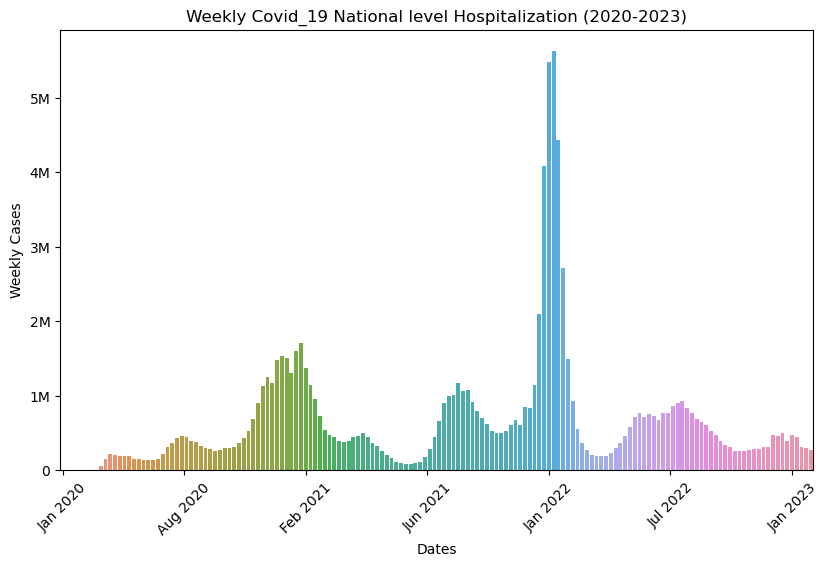

In [69]:
# Create a single dimension canvas for the plot 
fig, ax = plt.subplots(figsize= (10,6),layout='constrained')
# Use seaborn library to plot 
sns.barplot(x = 'Dates', y ='Weekly Cases', data = Final_sorted_df)
# Foramting both axes
ax.set_xticks(np.arange(0, 158, 25.5), ['Jan 2020', 'Aug 2020', 'Feb 2021','Jun 2021', 
                                        'Jan 2022','Jul 2022', 'Jan 2023'], rotation = 45)
ax.set_yticks(np.arange(0, 6000000, 1000000), ['0', '1M', '2M','3M', '4M','5M'])

ax.set_title('Weekly Covid_19 National level Hospitalization (2020-2023)');
#ax.set_title(r"$\bf{" + 'Weekly Covid19 National level Hospitalization (2020-2023)' + "}$");
plt.savefig("output_data/Fig1.png")
plt.tight_layout()
#r"$\bf{" + str('Weekly Covid_19 National level Hospitalization (2020-2023)') + "}$")

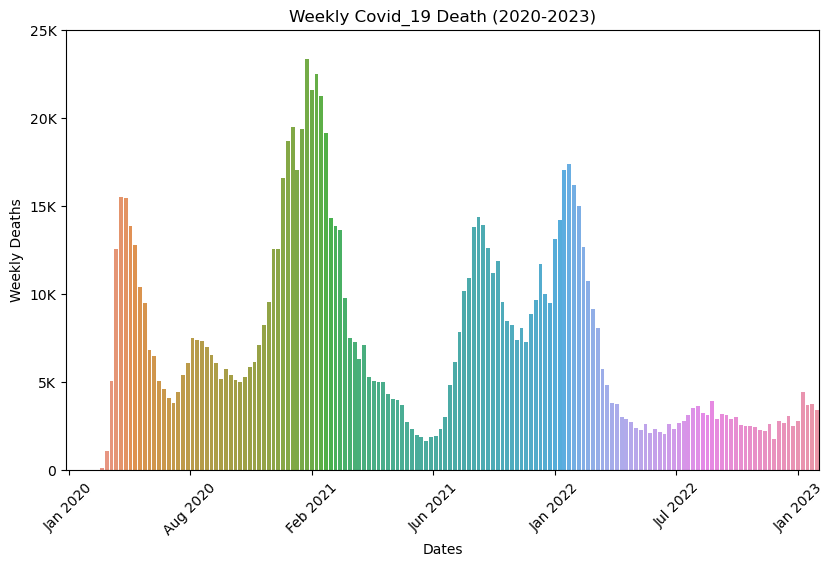

In [64]:
# Create a single dimension canvas for the plot 
fig, ax = plt.subplots(figsize= (10,6),layout='constrained')
# Use seaborn library to plot 
sns.barplot(x = 'Dates', y ='Weekly Deaths', data = Final_sorted_df)
# Foramting both axes
ax.set_xticks(np.arange(0, 158, 25.5), ['Jan 2020', 'Aug 2020', 'Feb 2021','Jun 2021', 
                                        'Jan 2022','Jul 2022', 'Jan 2023'], rotation = 45)
ax.set_yticks(np.arange(0, 30000, 5000), ['0', '5K', '10K','15K', '20K','25K'])

ax.set_title('Weekly Covid_19 Death (2020-2023)');
plt.savefig("output_data/Fig2.png")
plt.tight_layout()

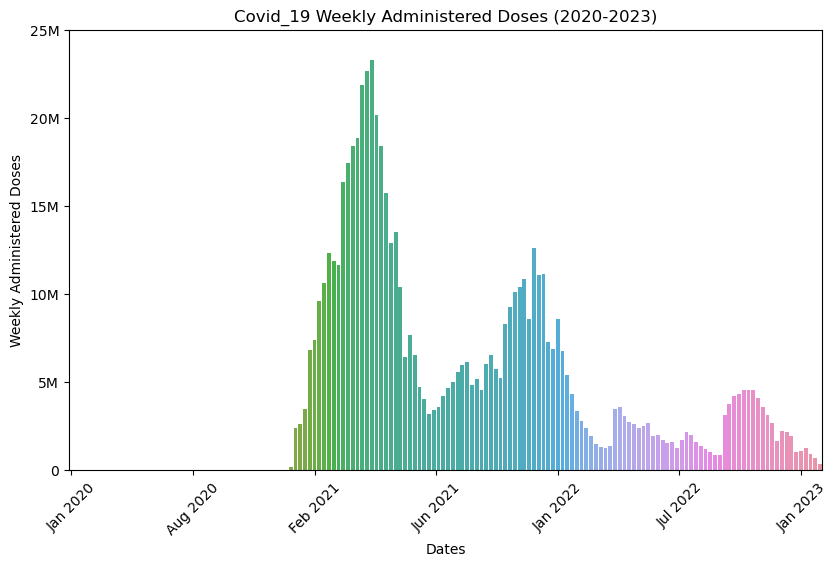

In [63]:
# Create a single dimension canvas for the plot 
fig, ax = plt.subplots(figsize= (10,6),layout='constrained')
# Use seaborn library to plot 
sns.barplot(x = 'Dates', y ='Weekly Administered Doses', data = Final_sorted_df)
# Foramting both axes
ax.set_xticks(np.arange(0, 158, 25.5), ['Jan 2020', 'Aug 2020', 'Feb 2021','Jun 2021', 
                                        'Jan 2022','Jul 2022', 'Jan 2023'], rotation = 45)
ax.set_yticks(np.arange(0, 30000000, 5000000), ['0', '5M', '10M','15M', '20M','25M'])

ax.set_title('Covid_19 Weekly Administered Doses (2020-2023)');
plt.savefig("output_data/Fig3.png")
plt.tight_layout()
